This notebook is for data preprocessing

In [34]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('/storage/projects2/e17006-GBManalysis/GBM-analysis/data/Pre-operative_TCGA_GBM_NIfTI_and_Segmentations/TCGA_GBM_radiomicFeatures.csv')

In [5]:
train.head()

,ID,Date,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,...,TGM_Cog_Z_4,TGM_T_4,TGM_Cog_X_5,TGM_Cog_Y_5,TGM_Cog_Z_5,TGM_T_5,TGM_Cog_X_6,TGM_Cog_Y_6,TGM_Cog_Z_6,TGM_T_6
0,TCGA-02-0006,1996.08.23,1662,384,36268,2046,38314,1469432,4.328125,0.045826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-02-0009,1997.06.14,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-02-0011,1998.02.01,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-02-0027,1999.03.28,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-02-0033,1997.05.26,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns with null values are significant. Therefore drop the columns with null vals.

Get the OS data from the OS/name_mapping.csv, OS/survival_data file and add it to the dataframe

In [6]:
maps = pd.read_csv('/storage/projects2/e17006-GBManalysis/GBM-analysis/data/OS/name_mapping.csv')
maps.head()

,Grade,BraTS_2017_subject_ID,BraTS_2018_subject_ID,TCGA_TCIA_subject_ID,BraTS_2019_subject_ID
0,HGG,Brats17_CBICA_AAB_1,Brats18_CBICA_AAB_1,NaN,BraTS19_CBICA_AAB_1
1,HGG,Brats17_CBICA_AAG_1,Brats18_CBICA_AAG_1,NaN,BraTS19_CBICA_AAG_1
2,HGG,Brats17_CBICA_AAL_1,Brats18_CBICA_AAL_1,NaN,BraTS19_CBICA_AAL_1
3,HGG,Brats17_CBICA_AAP_1,Brats18_CBICA_AAP_1,NaN,BraTS19_CBICA_AAP_1
4,HGG,Brats17_CBICA_ABB_1,Brats18_CBICA_ABB_1,NaN,BraTS19_CBICA_ABB_1


In [7]:
OS = pd.read_csv('/storage/projects2/e17006-GBManalysis/GBM-analysis/data/OS/survival_data.csv')
OS.head()

,BraTS19ID,Age,Survival,ResectionStatus
0,BraTS19_CBICA_AAB_1,60.463014,289,GTR
1,BraTS19_CBICA_AAG_1,52.263014,616,GTR
2,BraTS19_CBICA_AAL_1,54.301370,464,GTR
3,BraTS19_CBICA_AAP_1,39.068493,788,GTR
4,BraTS19_CBICA_ABB_1,68.493151,465,GTR


Merging the OS data with train with name mappings

In [8]:
# Merge df_A with df_B on A1 = B1
merged_AB = train.merge(maps, how='inner', left_on='ID', right_on='TCGA_TCIA_subject_ID')
merged_AB.head()

,ID,Date,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,...,TGM_T_5,TGM_Cog_X_6,TGM_Cog_Y_6,TGM_Cog_Z_6,TGM_T_6,Grade,BraTS_2017_subject_ID,BraTS_2018_subject_ID,TCGA_TCIA_subject_ID,BraTS_2019_subject_ID
0,TCGA-02-0006,1996.08.23,1662,384,36268,2046,38314,1469432,4.328125,0.045826,...,NaN,NaN,NaN,NaN,NaN,HGG,Brats17_TCIA_425_1,Brats18_TCIA01_425_1,TCGA-02-0006,BraTS19_TCIA01_425_1
1,TCGA-02-0009,1997.06.14,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,...,NaN,NaN,NaN,NaN,NaN,HGG,Brats17_TCIA_190_1,Brats18_TCIA01_190_1,TCGA-02-0009,BraTS19_TCIA01_190_1
2,TCGA-02-0011,1998.02.01,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,...,NaN,NaN,NaN,NaN,NaN,HGG,Brats17_TCIA_460_1,Brats18_TCIA01_460_1,TCGA-02-0011,BraTS19_TCIA01_460_1
3,TCGA-02-0027,1999.03.28,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,...,NaN,NaN,NaN,NaN,NaN,HGG,Brats17_TCIA_186_1,Brats18_TCIA01_186_1,TCGA-02-0027,BraTS19_TCIA01_186_1
4,TCGA-02-0033,1997.05.26,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,...,NaN,NaN,NaN,NaN,NaN,HGG,Brats17_TCIA_429_1,Brats18_TCIA01_429_1,TCGA-02-0033,BraTS19_TCIA01_429_1


In [9]:
# Merge merged_AB with df_C on B2 = C2
result = merged_AB.merge(OS, how='inner', left_on='BraTS_2019_subject_ID', right_on='BraTS19ID')
result.head()

,ID,Date,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,...,TGM_T_6,Grade,BraTS_2017_subject_ID,BraTS_2018_subject_ID,TCGA_TCIA_subject_ID,BraTS_2019_subject_ID,BraTS19ID,Age,Survival,ResectionStatus
0,TCGA-02-0006,1996.08.23,1662,384,36268,2046,38314,1469432,4.328125,0.045826,...,NaN,HGG,Brats17_TCIA_425_1,Brats18_TCIA01_425_1,TCGA-02-0006,BraTS19_TCIA01_425_1,BraTS19_TCIA01_425_1,56.208219,558,NaN
1,TCGA-02-0009,1997.06.14,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,...,NaN,HGG,Brats17_TCIA_190_1,Brats18_TCIA01_190_1,TCGA-02-0009,BraTS19_TCIA01_190_1,BraTS19_TCIA01_190_1,61.526027,322,NaN
2,TCGA-02-0011,1998.02.01,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,...,NaN,HGG,Brats17_TCIA_460_1,Brats18_TCIA01_460_1,TCGA-02-0011,BraTS19_TCIA01_460_1,BraTS19_TCIA01_460_1,18.975342,630,NaN
3,TCGA-02-0027,1999.03.28,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,...,NaN,HGG,Brats17_TCIA_186_1,Brats18_TCIA01_186_1,TCGA-02-0027,BraTS19_TCIA01_186_1,BraTS19_TCIA01_186_1,33.887671,370,NaN
4,TCGA-02-0033,1997.05.26,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,...,NaN,HGG,Brats17_TCIA_429_1,Brats18_TCIA01_429_1,TCGA-02-0033,BraTS19_TCIA01_429_1,BraTS19_TCIA01_429_1,54.986301,86,NaN


In [10]:
i = 0
for col in result.columns:
    i += 1
    nan_count = result[col].isnull().sum()
    print(f"Column{i} '{col}' has {nan_count} NaN values")  # Use f-strings for formatting

Column1 'ID' has 0 NaN values
Column2 'Date' has 0 NaN values
Column3 'VOLUME_ET' has 0 NaN values
Column4 'VOLUME_NET' has 0 NaN values
Column5 'VOLUME_ED' has 0 NaN values
Column6 'VOLUME_TC' has 0 NaN values
Column7 'VOLUME_WT' has 0 NaN values
Column8 'VOLUME_BRAIN' has 0 NaN values
Column9 'VOLUME_ET_OVER_NET' has 0 NaN values
Column10 'VOLUME_ET_OVER_ED' has 0 NaN values
Column11 'VOLUME_NET_OVER_ED' has 0 NaN values
Column12 'VOLUME_ET_over_TC' has 0 NaN values
Column13 'VOLUME_NET_over_TC' has 0 NaN values
Column14 'VOLUME_ED_over_TC' has 0 NaN values
Column15 'VOLUME_ET_OVER_WT' has 0 NaN values
Column16 'VOLUME_NET_OVER_WT' has 0 NaN values
Column17 'VOLUME_ED_OVER_WT' has 0 NaN values
Column18 'VOLUME_TC_OVER_WT' has 0 NaN values
Column19 'VOLUME_ET_OVER_BRAIN' has 0 NaN values
Column20 'VOLUME_NET_OVER_BRAIN' has 0 NaN values
Column21 'VOLUME_ED_over_BRAIN' has 0 NaN values
Column22 'VOLUME_TC_over_BRAIN' has 0 NaN values
Column23 'VOLUME_WT_OVER_BRAIN' has 0 NaN values
Col

In [11]:
# just to check if the merge was correct
result.shape

(102, 735)

In [12]:
# remove the rows with NaN for 'Survival'
result = result.dropna(subset=['Survival'])

# Cluster OS by age

In [13]:
# get the dtype of Survival column
result['Survival'].dtype

# q: dtype('O') means what?
# a: dtype('O') means that the column contains strings, i.e. objects

dtype('O')

In [14]:
# change the dtype of Survival column to int
result['Survival'] = result['Survival'].astype(int)

In [15]:
# Count rows with values above 900
above_900 = result[result['Survival'] > 900].shape[0]

# Count rows with values between 300 and 900
between_300_900 = result[(result['Survival'] > 300) & (result['Survival'] <= 900)].shape[0]

# Count rows with values below 300
below_300 = result[result['Survival'] < 300].shape[0]

# Print the results
print(f"Number of rows with values above 900: {above_900}")
print(f"Number of rows with values between 300 and 900: {between_300_900}")
print(f"Number of rows with values below 300: {below_300}")

Number of rows with values above 900: 6
Number of rows with values between 300 and 900: 39
Number of rows with values below 300: 31


In [16]:
# Count rows with values above 450
above_450 = result[result['Survival'] > 450].shape[0]

# Count rows with values between 300 and 450
between_300_450 = result[(result['Survival'] > 300) & (result['Survival'] <= 450)].shape[0]

# Count rows with values below 300
below_300 = result[result['Survival'] < 300].shape[0]

# Print the results
print(f"Number of rows with values above 450: {above_450}")
print(f"Number of rows with values between 300 and 450: {between_300_450}")
print(f"Number of rows with values below 300: {below_300}")

Number of rows with values above 450: 25
Number of rows with values between 300 and 450: 20
Number of rows with values below 300: 31


In [17]:
# Divide the Survival column into 3 catogories. 1: above 450, 2: between 300 and 450, 3: below  300. Have this in a new column called 'Survival_cat'
result.loc[result['Survival'] > 450, 'Survival_cat'] = 'HIGH'
result.loc[(result['Survival'] > 300) & (result['Survival'] <= 450), 'Survival_cat'] = 'MID'
result.loc[result['Survival'] < 300, 'Survival_cat'] = 'LOW'

result.head()

,ID,Date,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,...,Grade,BraTS_2017_subject_ID,BraTS_2018_subject_ID,TCGA_TCIA_subject_ID,BraTS_2019_subject_ID,BraTS19ID,Age,Survival,ResectionStatus,Survival_cat
0,TCGA-02-0006,1996.08.23,1662,384,36268,2046,38314,1469432,4.328125,0.045826,...,HGG,Brats17_TCIA_425_1,Brats18_TCIA01_425_1,TCGA-02-0006,BraTS19_TCIA01_425_1,BraTS19_TCIA01_425_1,56.208219,558,NaN,HIGH
1,TCGA-02-0009,1997.06.14,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,...,HGG,Brats17_TCIA_190_1,Brats18_TCIA01_190_1,TCGA-02-0009,BraTS19_TCIA01_190_1,BraTS19_TCIA01_190_1,61.526027,322,NaN,MID
2,TCGA-02-0011,1998.02.01,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,...,HGG,Brats17_TCIA_460_1,Brats18_TCIA01_460_1,TCGA-02-0011,BraTS19_TCIA01_460_1,BraTS19_TCIA01_460_1,18.975342,630,NaN,HIGH
3,TCGA-02-0027,1999.03.28,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,...,HGG,Brats17_TCIA_186_1,Brats18_TCIA01_186_1,TCGA-02-0027,BraTS19_TCIA01_186_1,BraTS19_TCIA01_186_1,33.887671,370,NaN,MID
4,TCGA-02-0033,1997.05.26,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,...,HGG,Brats17_TCIA_429_1,Brats18_TCIA01_429_1,TCGA-02-0033,BraTS19_TCIA01_429_1,BraTS19_TCIA01_429_1,54.986301,86,NaN,LOW


In [ ]:
# save this dataframe as a csv file in data folder
result.to_csv('/storage/projects2/e17006-GBManalysis/GBM-analysis/data/OS/PreProcess_data.csv', index=False)

# Feature Selection

## PCA

In [22]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# remove unwanted colums of the result df
df = pd.read_csv('/storage/projects2/e17006-GBManalysis/GBM-analysis/data/PreProcess_data_2_train.csv')
df.head()

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,...,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Age,Survival_cat
0,1662,384,36268,2046,38314,1469432,4.328125,0.045826,0.010588,0.81232,...,2203.2034,61.3293,8.00000,7.500000e-07,0.178609,0.096256,0.052741,2.0000,56.208219,HIGH
1,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,0.276601,0.50075,...,1440.4285,3.5999,3.31250,1.000000e-09,0.077619,0.122900,0.094336,91.4736,61.526027,MID
2,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,1.061444,0.40729,...,1147.5177,0.8048,5.78125,1.000000e-09,0.132283,0.116006,0.096035,272.4290,18.975342,HIGH
3,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,0.222584,0.61489,...,3320.1690,4.7336,3.87500,1.000000e-09,0.100415,0.088249,0.096470,128.4680,33.887671,MID
4,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,0.108708,0.82875,...,1834.1052,2.4532,1.00000,5.730000e-08,0.106184,0.131952,0.096894,240.7780,54.986301,LOW


In [7]:
# in column 'Survival_cat' if LOW then 0, if MID then 1, if HIGH then 2
df.loc[df['Survival_cat'] == 'LOW', 'Survival_cat'] = 0
df.loc[df['Survival_cat'] == 'MID', 'Survival_cat'] = 1
df.loc[df['Survival_cat'] == 'HIGH', 'Survival_cat'] = 2

df.head()

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,...,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Age,Survival_cat
0,1662,384,36268,2046,38314,1469432,4.328125,0.045826,0.010588,0.81232,...,2203.2034,61.3293,8.00000,7.500000e-07,0.178609,0.096256,0.052741,2.0000,56.208219,2
1,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,0.276601,0.50075,...,1440.4285,3.5999,3.31250,1.000000e-09,0.077619,0.122900,0.094336,91.4736,61.526027,1
2,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,1.061444,0.40729,...,1147.5177,0.8048,5.78125,1.000000e-09,0.132283,0.116006,0.096035,272.4290,18.975342,2
3,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,0.222584,0.61489,...,3320.1690,4.7336,3.87500,1.000000e-09,0.100415,0.088249,0.096470,128.4680,33.887671,1
4,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,0.108708,0.82875,...,1834.1052,2.4532,1.00000,5.730000e-08,0.106184,0.131952,0.096894,240.7780,54.986301,0


In [8]:
# df without age column
df_noAge = df.drop(['Age'], axis=1)


In [25]:
# take x data and y data from the df_noAge, and convert them to numpy arrays, y is the last column which is catogorical
X = df_noAge.iloc[:, :-1].values
y = df_noAge.iloc[:, -1].values

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Obtain the priniciple compoenents
pca = PCA()     # all components
pca = pca.fit(X_scaled)

# q: transform() vs fit_transform()
# a: fit_transform() is used on the training data so that we can 
#scale the training data and also learn the scaling parameters of that data.
# Then we use the learned parameters to scale the test data.
# transform() is used on the test data to scale it using the
# parameters learned on the training data.

In [29]:
pc = pca.transform(X_scaled)

In [30]:
pc.shape

(76, 76)

Text(0, 0.5, 'Proportion of Variance Explained')

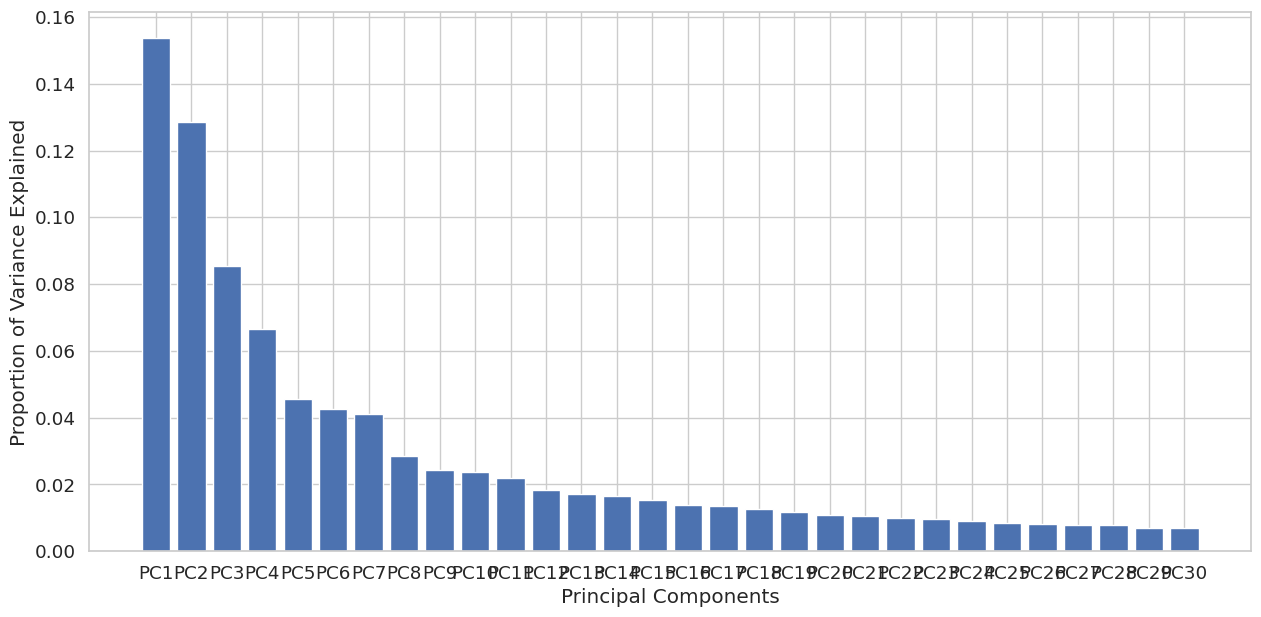

In [50]:
var = pca.explained_variance_ratio_[0:30]
points = np.arange(30)
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']

# store the cumulative sum of var in points
points = np.cumsum(np.round(var, decimals=4)*100)

# plot the explained variance and points as a line graph
plt.figure(figsize=(15,7))
plt.bar(labels, var)
#plt.plot(points, var, c='red')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')

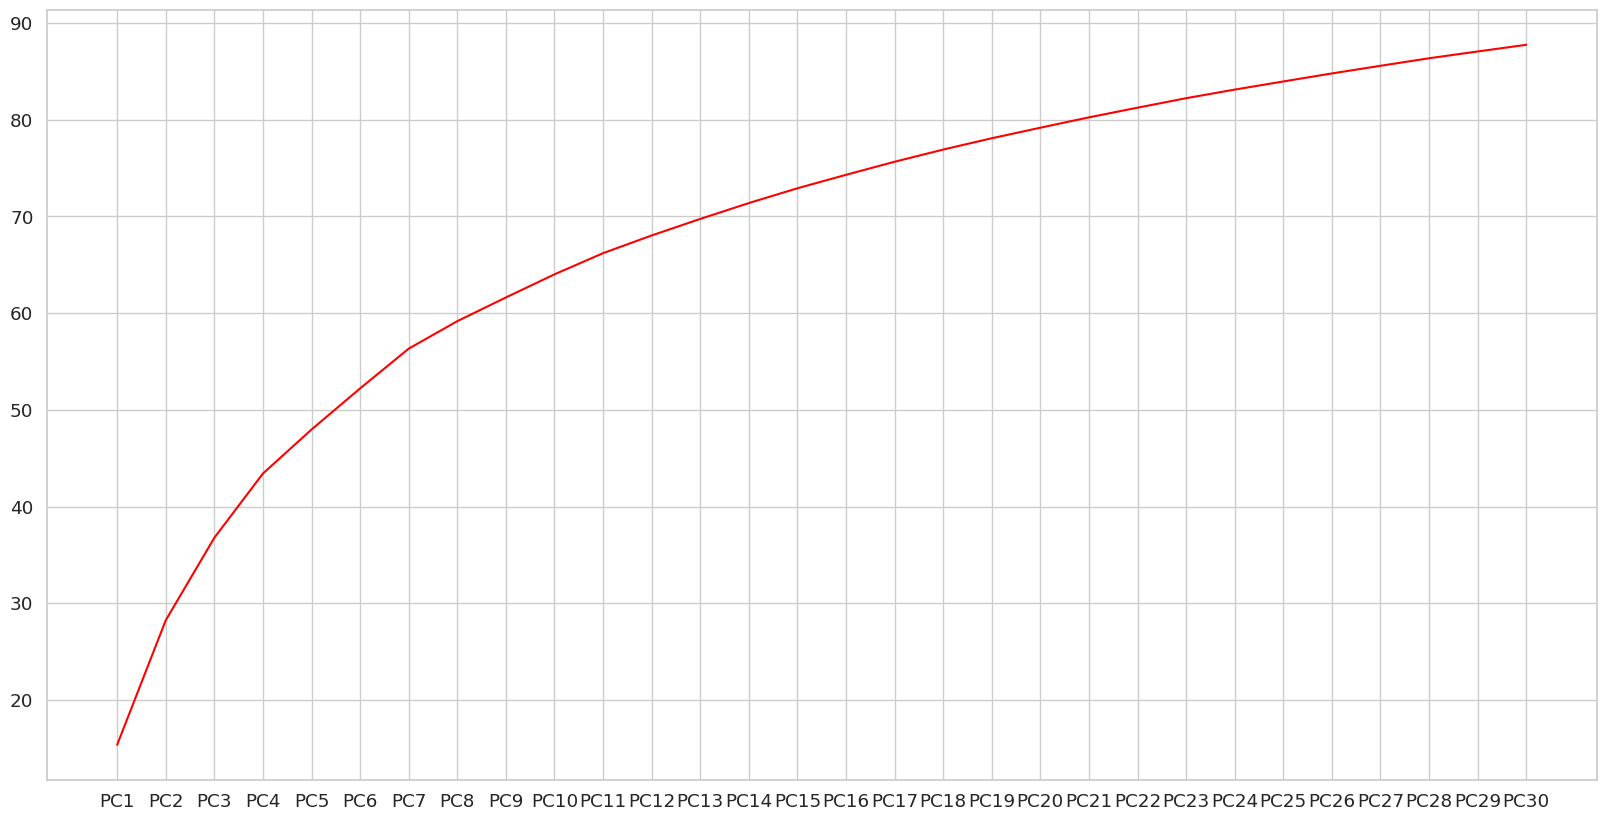

In [51]:
plt.figure(figsize=(20,10))
plt.plot(labels,points,c='red')

# Models

## 1. Random Forest

## 2. Naive Bayes